In [1]:
import numpy as np
import pylab as plt
from matplotlib.colors import LogNorm

from example import ExampleProblem

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True

In [11]:
exampleProblem = ExampleProblem()
exampleProblem.set_bins_x_ini(30, -30, 30)
exampleProblem.set_bins_b_ini(30, -30, 30)
exampleProblem.setup_example()

print("bins in x:", exampleProblem.n_bins_x)
#print("bins x: ", exampleProblem.bins_x, "\nbin centers x: ", exampleProblem.bin_centers_x)
print("bins in b:", exampleProblem.n_bins_b)
#print("bins b: ", exampleProblem.bins_b, "\nbin centers b: ", exampleProblem.bin_centers_b)

bins in x: 30
bins in b: 30


<IPython.core.display.Javascript object>


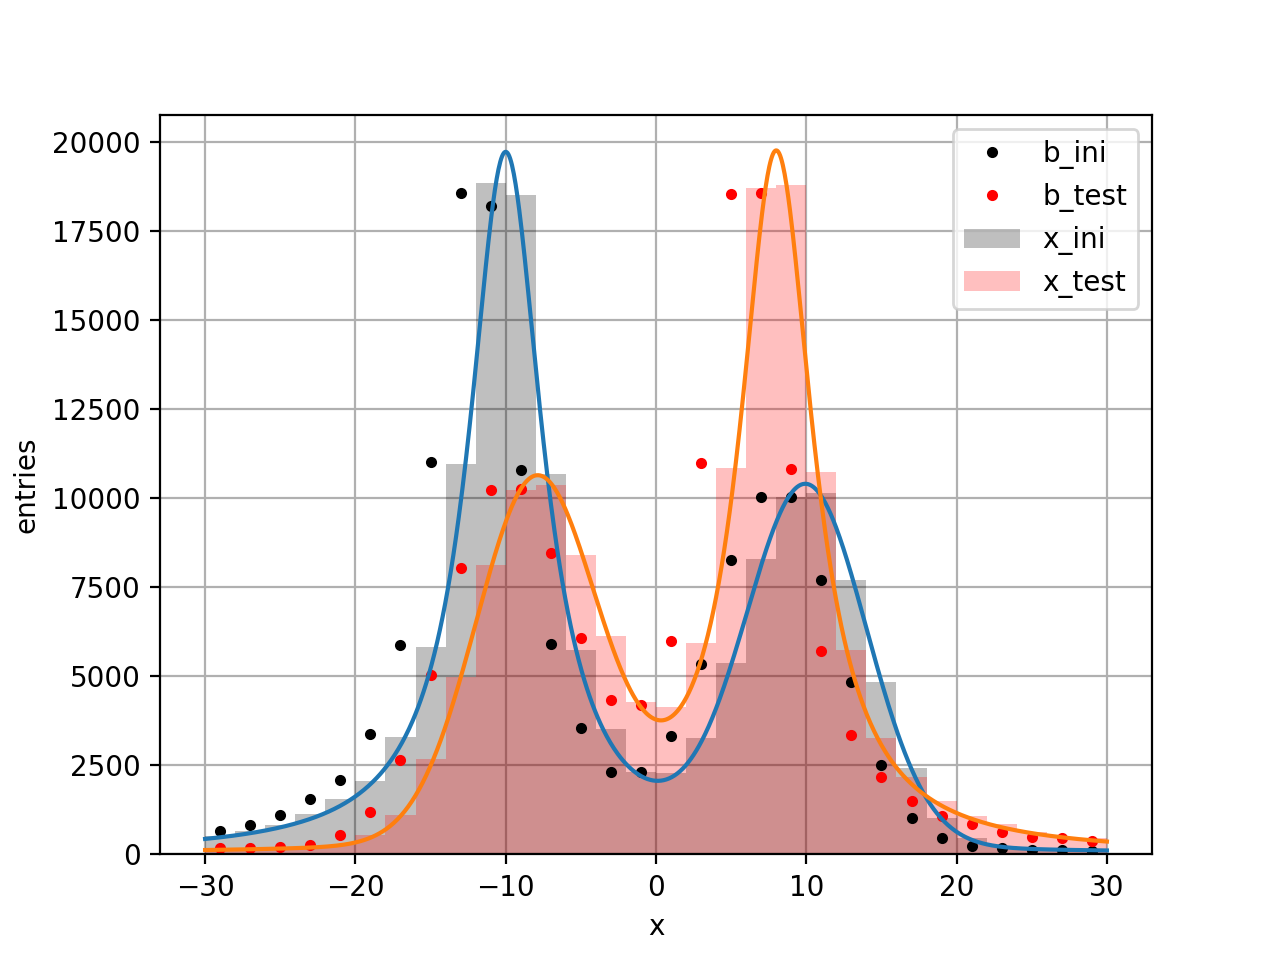

185982.0 100000.0
100000.0 186330.0


In [12]:
%matplotlib notebook

x_ini_gen = exampleProblem.get_initial_MC()
x_ini = np.histogram(x_ini_gen, exampleProblem.bins_x)
x_test_gen = exampleProblem.get_test_distribution()
x_test = np.histogram(x_test_gen, exampleProblem.bins_x)

b_ini_gen = exampleProblem.get_initial_MC_data()
b_ini = np.histogram(b_ini_gen, exampleProblem.bins_b)
b_test_gen = exampleProblem.get_test_data()
b_test = np.histogram(b_test_gen, exampleProblem.bins_b)

plt.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="black", label="x_ini", alpha=0.25)
plt.hist(x_test_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="red", label="x_test", alpha=0.25)
plt.plot(exampleProblem.bin_centers_b, b_ini[0], ".", color="black", label="b_ini")
plt.plot(exampleProblem.bin_centers_b, b_test[0], ".", color="red", label="b_test")

plt.xlabel("x")
plt.ylabel("entries")
plt.legend()
#plt.yscale("log")
x = np.linspace(exampleProblem.bins_x[0], exampleProblem.bins_x[-1], 1000)
plt.plot(x, exampleProblem.true_distribution(x))
plt.plot(x, exampleProblem.test_distribution(x))

<IPython.core.display.Javascript object>


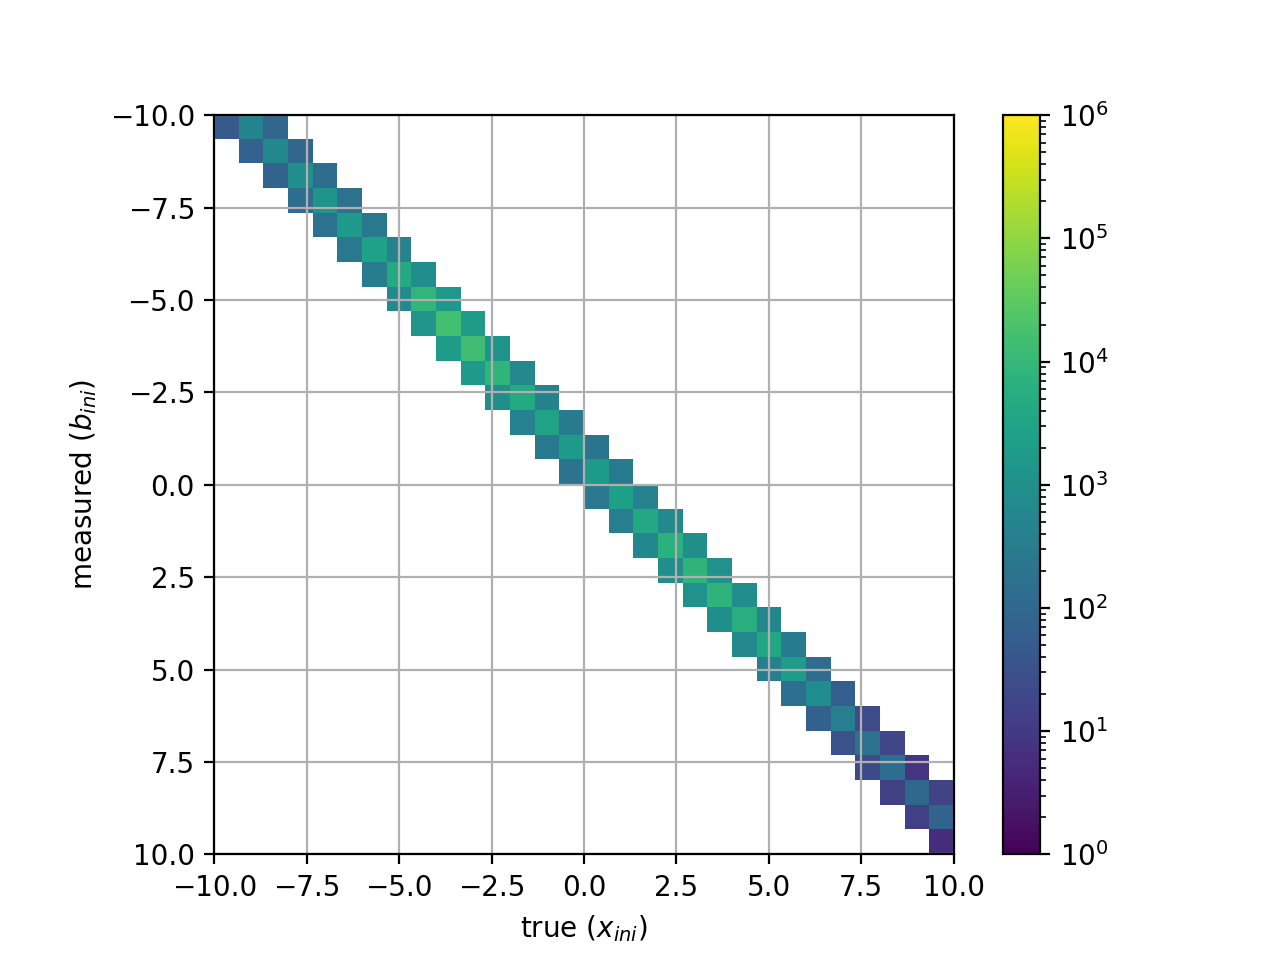

In [13]:
%matplotlib notebook

A = exampleProblem.get_response_matrix()[0].T

plt.imshow((A), norm=LogNorm(vmin=1, vmax=1e6), \
           extent=[max(np.min(x_ini_gen),-10),min(np.max(x_ini_gen),10),min(np.max(b_ini_gen),10),max(np.min(b_ini_gen),-10)])
           #extent=[np.min(x_ini_gen),np.max(x_ini_gen),np.max(b_test_gen),np.min(b_test_gen)])
plt.xlabel("true ($x_{ini}$)")
plt.ylabel("measured ($b_{ini}$)")
plt.colorbar()
#plt.axis((-20,20,-20,20))
plt.show()


<IPython.core.display.Javascript object>


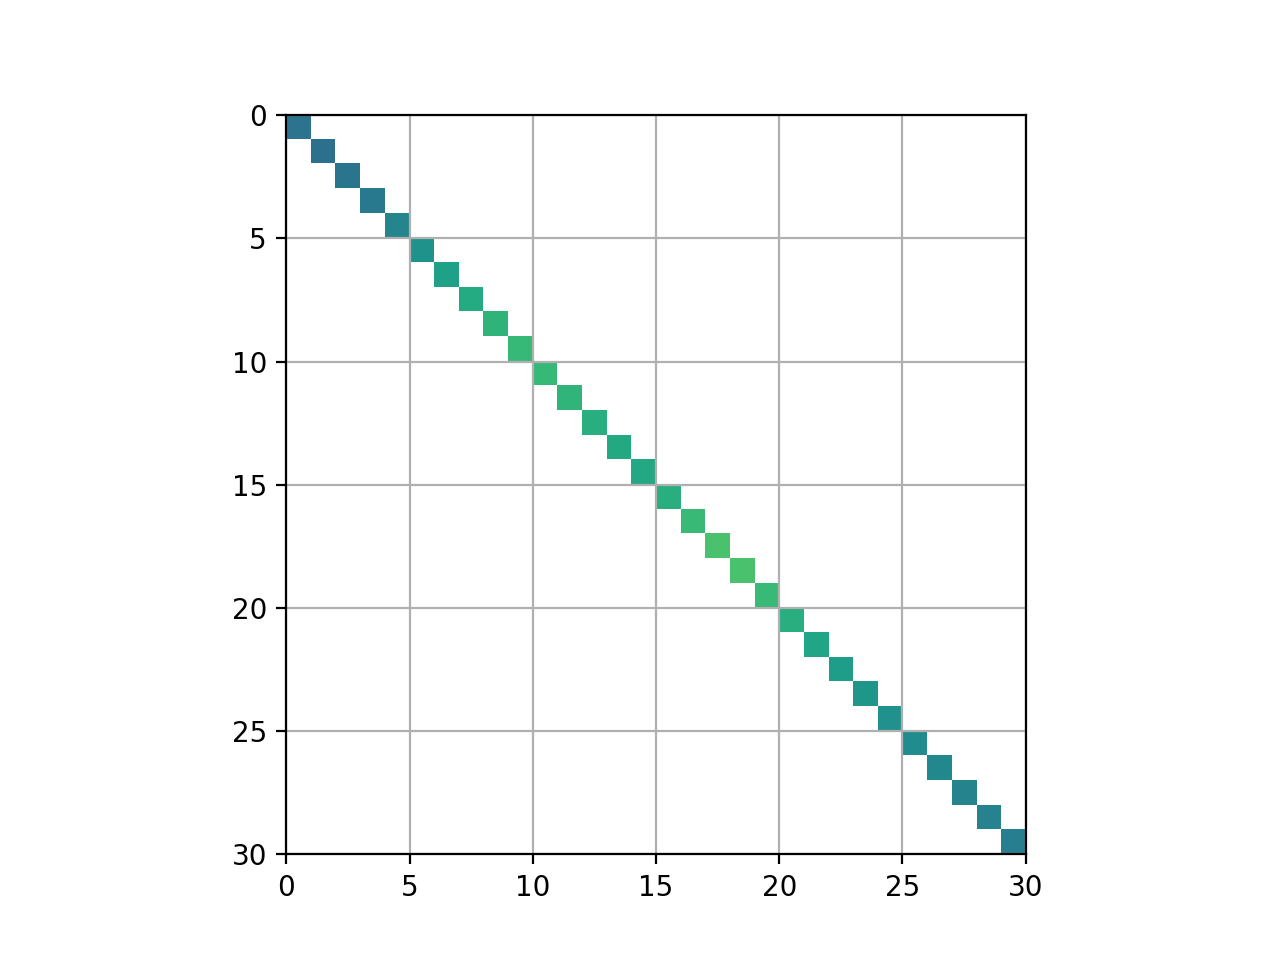

In [14]:
%matplotlib notebook

B = exampleProblem.get_test_data_covariance()
plt.imshow(B, norm=LogNorm(vmin=1, vmax=1e6), \
           extent=[0, exampleProblem.n_bins_b, exampleProblem.n_bins_b, 0])
#plt.colorbar()
plt.show()

In [15]:
import svdunfold
unfold = svdunfold.SVDunfold(x_ini, b_test, A, B)
unfold.transform_system()
d = unfold.get_abs_d()

cov:  (30, 30)
Q, r: (30, 30) (30,)
b_transformed: (30,)
trans response:  (30, 30)
U, S, VT shapes:  (30, 30) (30,) (30, 30)


<IPython.core.display.Javascript object>


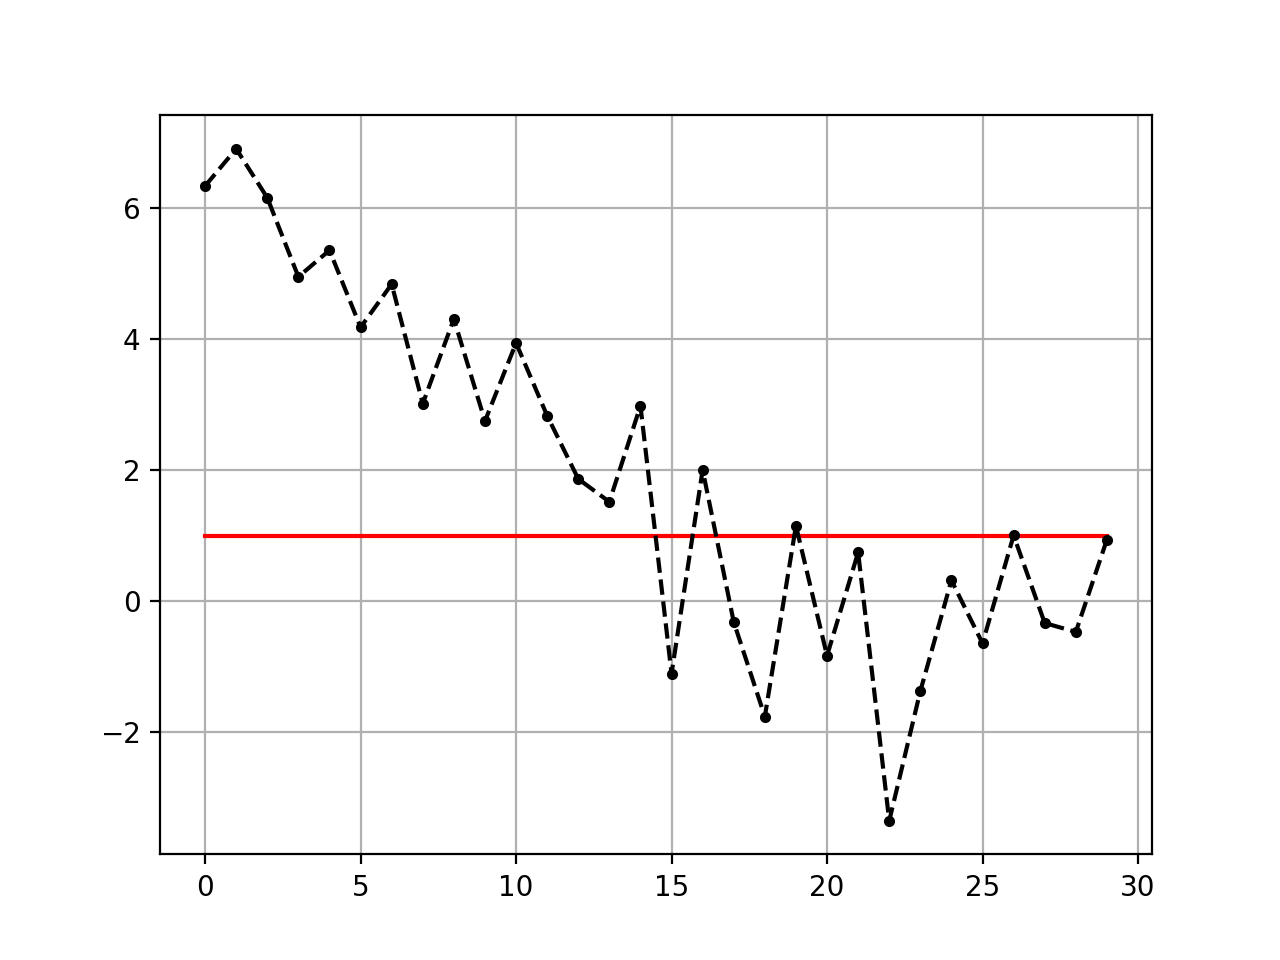

In [16]:
%matplotlib notebook
plt.plot(np.arange(len(d)), np.ones(len(d)), "r-" )
plt.plot(np.arange(len(d)), d, "k.--")


<IPython.core.display.Javascript object>


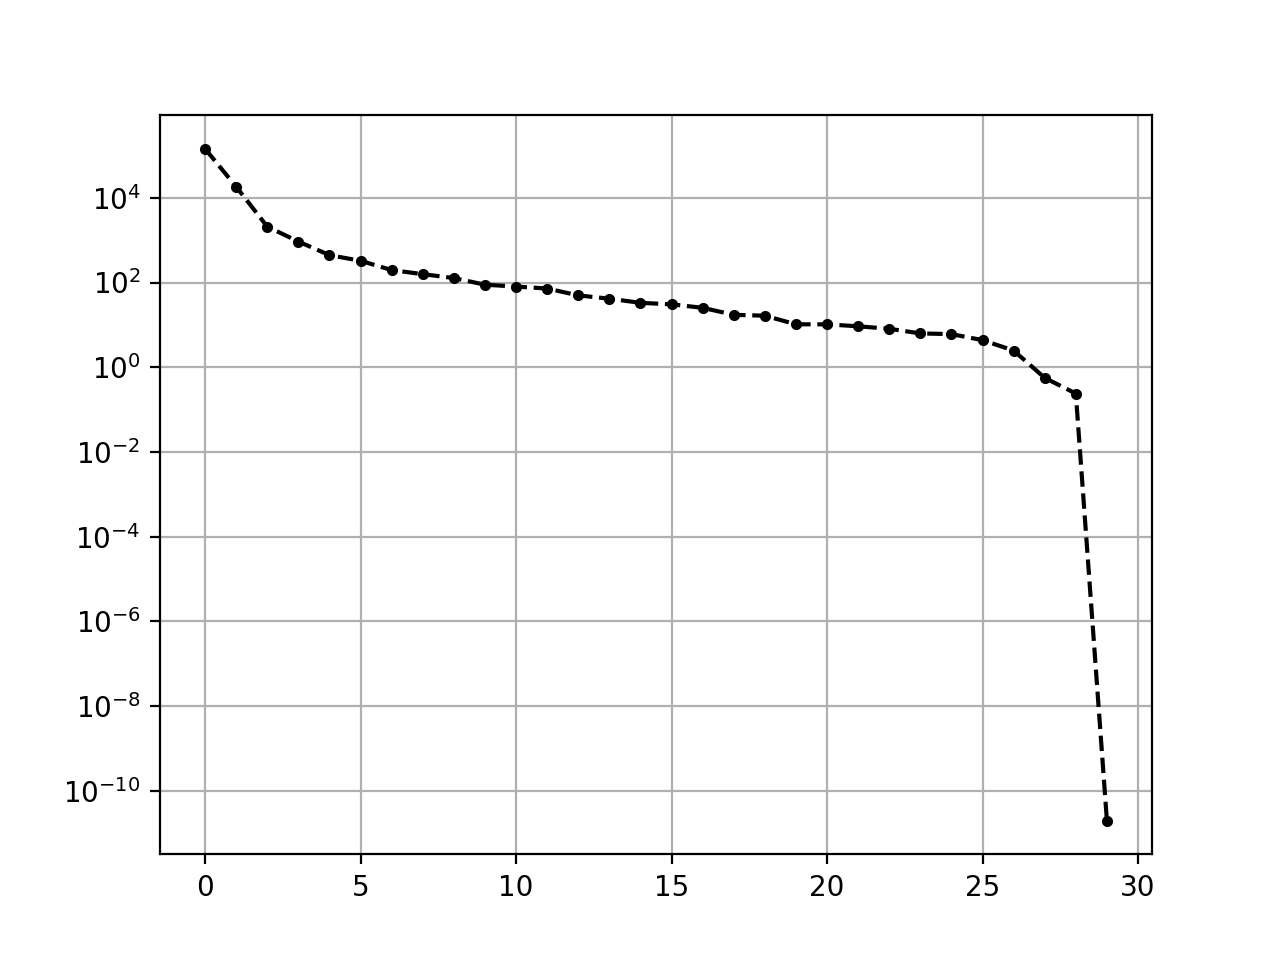

In [17]:
%matplotlib notebook
s = unfold.get_singular_values()
plt.plot(np.arange(len(s)), s, "k.--")
plt.yscale("log")

<IPython.core.display.Javascript object>


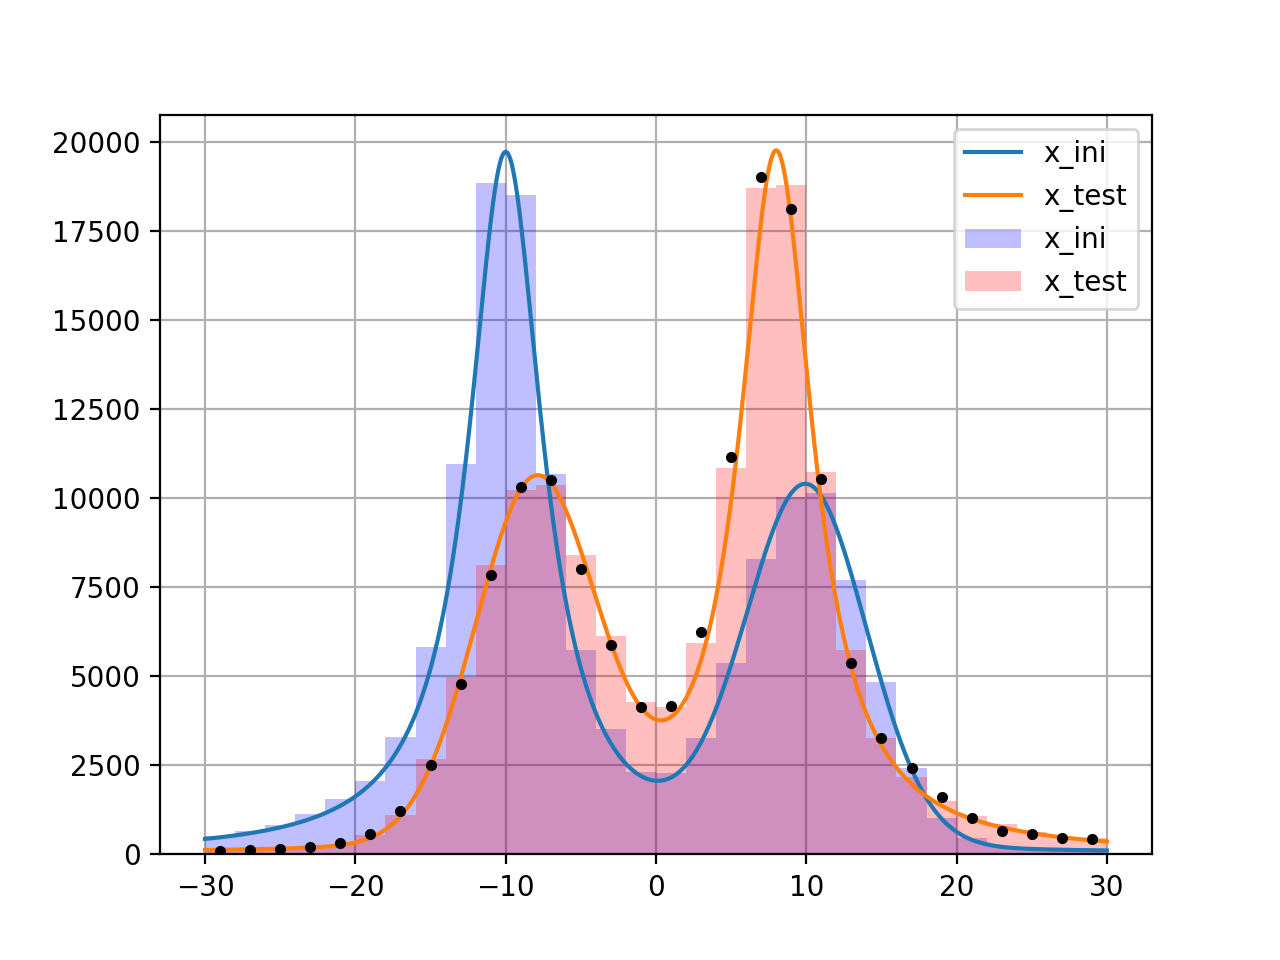

185982.0 100000.0
100000.0 186330.0


In [19]:
unfold.unfold(14)
x = unfold.get_unfolded_distribution()
X = unfold.get_unfolded_cov_matrix()

%matplotlib notebook
plt.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="blue", label="x_ini", alpha=0.25)
plt.hist(x_test_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="red", label="x_test", alpha=0.25)
plt.errorbar(exampleProblem.bin_centers_x, x, fmt="k.", yerr=np.sqrt(np.diagonal(X)))
#plt.yscale("log")
x = np.linspace(exampleProblem.bins_x[0], exampleProblem.bins_x[-1], 1000)
plt.plot(x, exampleProblem.true_distribution(x), label="x_ini")
plt.plot(x, exampleProblem.test_distribution(x), label="x_test")
plt.legend()